In [3]:
import numpy as np
import time

import matplotlib.pyplot as plt

from tqdm import tqdm

from PIL import Image

In [4]:
def generate_random_matrix(rows, cols):
    return np.random.random((rows, cols))

# First Implementation as Formula O(n**4)

In [5]:
def get_dct_itself_scalar_product(k, n):
    p = n if k == 0 else n/2
    print("product = ", p)
    return p

def dct_cosine(k, i, n):
    dct_cosine = np.cos(k*np.pi*(2*i+1)/2*n)
    print("dct_cosine = ", dct_cosine)
    
    return dct_cosine

def dct_sum_j(vector, n, s):
    sum_j = 0
    for j in range(0, n):
        sum_j += vector[j]*dct_cosine(s, j, n)
    
    print("sum_j = ", sum_j)
    p = get_dct_itself_scalar_product(s, n)
    
    
    print("result dct sum_j = ", sum_j*1/p)
    return sum_j*1/p


def dct_sum_i(matrix, n, r, s):
    sum_i = 0
    
    for i in range(0, n):
        sum_i += dct_sum_j(matrix[i], n, r)*dct_cosine(s, i, n)
        
    print("sum_i = ", sum_i)
    
    p = get_dct_itself_scalar_product(r, n)
    
    print("result dct sum_i = ", sum_i*1/p)
    return sum_i*1/p



def dct2_formula_application(matrix):
    
    n = matrix.shape[0]
    coeff_matrix = np.zeros_like(matrix, dtype=np.float64)
    
    for r in range(0, n):
        for s in range(0, n):
            print("r, s = ", (r, s))
            coeff_matrix[r, s] = dct_sum_i(matrix, n, r, s)
    
    return coeff_matrix

# Scipy Implementation

In [6]:
from scipy.fftpack import dct as dct_scipy
from scipy.fftpack import idct as idct_scipy

# Using scipy's dct function
def dct2_scipy(matrix):
    return dct_scipy(dct_scipy(matrix, axis=0, norm='ortho'), axis=1, norm='ortho')


def idct2_scipy(coeff_matrix):
    return idct_scipy(idct_scipy(coeff_matrix, axis=1, norm='ortho'), axis=0, norm='ortho')


matrix = generate_random_matrix(3, 3)
print(matrix)
coeff_matrix = dct2_scipy(matrix)
print(coeff_matrix)

matrix_2 = idct2_scipy(coeff_matrix)
print(matrix_2)



[[0.46789332 0.55371813 0.1116882 ]
 [0.57122219 0.39102687 0.65869343]
 [0.15563447 0.59749177 0.64389596]]
[[ 1.38375478 -0.08962177 -0.11206369]
 [-0.10766428  0.42223331 -0.03822106]
 [-0.16771704  0.01238015 -0.30317194]]
[[0.46789332 0.55371813 0.1116882 ]
 [0.57122219 0.39102687 0.65869343]
 [0.15563447 0.59749177 0.64389596]]


# Custom Implementation O(n**3)

In [7]:
import numpy as np


def dct1(vector, n):          
    
    coeff_vector = np.zeros_like(vector, dtype=np.float64)    
    
    for k in range(n):                       
        cosine = np.cos((np.pi*k*(2*np.arange(n) + 1))/(2*n))       
        coeff_vector[k] = np.sqrt(2/n) * np.sum(vector * cosine)   
    
    coeff_vector[0] /= np.sqrt(2)

    return coeff_vector


def custom_dct2(matrix):
    # Get matrix size
    n, m = matrix.shape
    
    # Init coefficient matrix
    coeff_matrix = np.zeros_like(matrix, dtype=np.float64)
    
    # Compute rows DCT for each row
    for i in range(n):
        coeff_matrix[i, :] = dct1(matrix[i, :], n)
    
    # Compute columns DCT for each column of the coefficient matrix
    for j in range(m):
        coeff_matrix[:, j] = dct1(coeff_matrix[:, j], n)
    
    return coeff_matrix




# Time Complexity Analysis

In [18]:
def run_algorithm(alg, matrix):
    start = time.time()
    alg(matrix)
    end = time.time()
    elapsed = end - start
    
    #print(alg)
    #print("elapsed time: ", elapsed)
    
    return elapsed

def iteration(min_dim, max_dim, step):
    
    scipy_alg_log = []
    custom_alg_log = [] 
    o3_log = []
    o2_logN_log = []
    
    scipy_alg = []
    custom_alg = [] 
    o3 = []
    o2_logN = []
    
    x = []    
    
    with tqdm(total = max_dim - min_dim) as pbar:
        for n in range(min_dim, max_dim, step):
            o3_log.append(np.log(n**3))
            o2_logN_log.append(np.log(n**2*np.log(n)))
            
            o3.append(n**3)
            o2_logN.append((n**2)*np.log(n))
            
            x.append(n)
            
            matrix = generate_random_matrix(n, n)
            
            elpsed_scipy = run_algorithm(dct2_scipy, matrix)
            elapsed_custom = run_algorithm(custom_dct2, matrix)
            
            scipy_alg_log.append(np.log(elpsed_scipy))
            custom_alg_log.append(np.log(elapsed_custom))

            scipy_alg.append(elpsed_scipy)
            custom_alg.append(elapsed_custom)
            
            pbar.update(step)
    
    return o3_log, o2_logN_log, o3, scipy_alg_log, custom_alg_log, o2_logN, x, scipy_alg, custom_alg


In [19]:
o3_log, o2_logN_log, o3, scipy_alg_log, custom_alg_log, o2_logN, x, scipy_alg, custom_alg = iteration(800, 4000, 400)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3200/3200 [53:48<00:00,  1.01s/it]


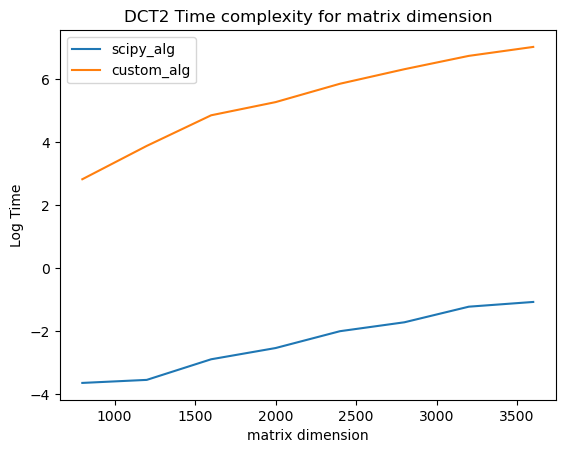

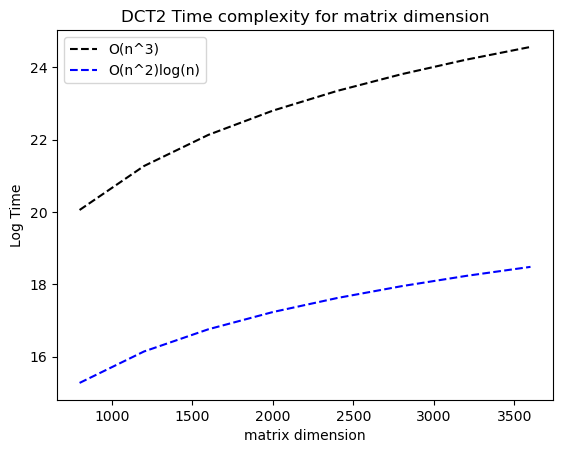

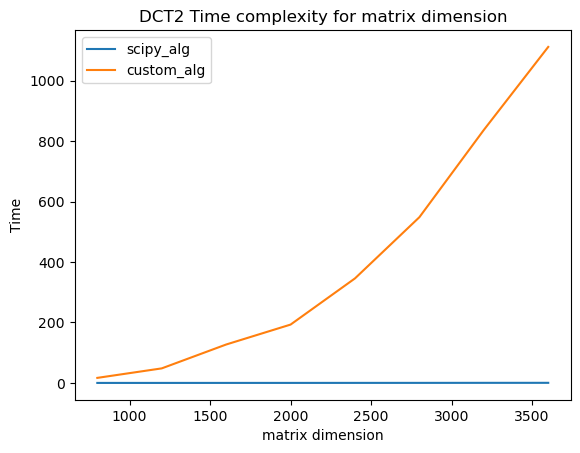

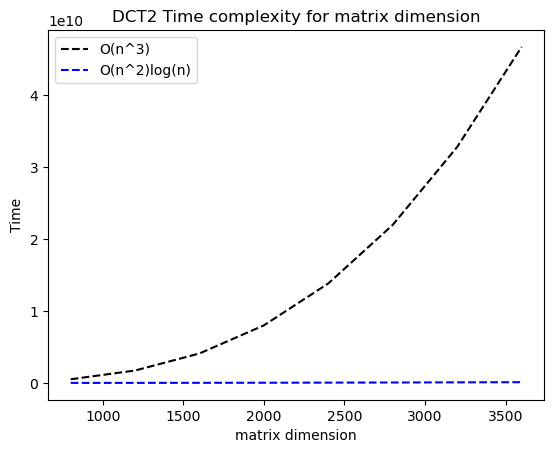

In [20]:

plt.plot(x, scipy_alg_log, label = "scipy_alg")
plt.plot(x, custom_alg_log, label = "custom_alg")


plt.title("DCT2 Time complexity for matrix dimension")
plt.xlabel("matrix dimension")
plt.ylabel("Log Time")

plt.legend()
plt.show()


plt.plot(x, o3_log, label = "O(n^3)", linestyle='--',  color='black')
plt.plot(x, o2_logN_log, label = "O(n^2)log(n)", linestyle='--', color='blue')


plt.title("DCT2 Time complexity for matrix dimension")
plt.xlabel("matrix dimension")
plt.ylabel("Log Time")

plt.legend()
plt.show()




plt.plot(x, scipy_alg, label = "scipy_alg")
plt.plot(x, custom_alg, label = "custom_alg")


plt.title("DCT2 Time complexity for matrix dimension")
plt.xlabel("matrix dimension")
plt.ylabel("Time")

plt.legend()
plt.show()


plt.plot(x, o3, label = "O(n^3)", linestyle='--',  color='black')
plt.plot(x, o2_logN, label = "O(n^2)log(n)", linestyle='--', color='blue')


plt.title("DCT2 Time complexity for matrix dimension")
plt.xlabel("matrix dimension")
plt.ylabel("Time")

plt.legend()
plt.show()


In [21]:
o3

[512000000,
 1728000000,
 4096000000,
 8000000000,
 13824000000,
 21952000000,
 32768000000,
 46656000000]

# Check Scaling Type

In [ ]:
m = np.array([[231, 32, 233, 161, 24, 71, 140, 245], 
[247, 40, 248, 245, 124, 204, 36, 107], 
[234, 202, 245, 167, 9, 217, 239, 173], 
[193, 190, 100, 167, 43, 180, 8, 70], 
[11, 24, 210, 177, 81, 243, 8, 112], 
[97, 195, 203, 47, 125, 114, 165, 181], 
[193, 70, 174, 167, 41, 30, 127, 245], 
[87, 149, 57, 192, 65, 129, 178, 228]] )

In [ ]:
custom_dct2(m)

In [ ]:
dct2_scipy(m)

In [ ]:
dct_scipy(m, axis=1, norm='ortho')

In [62]:


def divide_image_into_blocks(image_path, block_size):
    
    image = Image.open(image_path)
    
    if image.mode != 'L':
        print("converting image as grayscale")
        image = image.convert('L')
    
    image_array = np.array(image)
    
    height, width = image_array.shape
    print(height, width)
    
    num_blocks_height = height // block_size
    num_blocks_width = width // block_size
    
    print(num_blocks_height)
    print(num_blocks_width)
    
    # Initialize a list to store the image blocks
    blocks = []
    
    # Iterate over the blocks and extract each block
    for i in range(num_blocks_height):
        for j in range(num_blocks_width):
            block = image_array[i * block_size:(i + 1) * block_size,
                               j * block_size:(j + 1) * block_size]
            blocks.append(block)
    
    return blocks, num_blocks_height, num_blocks_width, image_array


def get_dct2_blocks(blocks, f, d):
    dct2_blocks = []
    
    for block in blocks:
        dct2_block = dct2_scipy(block)
        
        for i in range(0, f):
            for j in range(0, f):
                if i + j >= d:
                    dct2_block[i, j] = 0
        
        
        dct2_blocks.append(dct2_block)
        
    return dct2_blocks

def get_image(dct2_blocks, f, num_blocks_height, num_blocks_width):
    
    width_list = []
    matrix_list = []
    
    support_matrix = np.zeros((f*num_blocks_height, f*num_blocks_width))
    
    width_counter = 0
    height_counter = 0
    
    for dct2_block in dct2_blocks:
        
        image_block = idct2_scipy(dct2_block)
        
        for i in range(0, f):
            for j in range(0, f):
                image_block[i, j] = round(image_block[i, j])
                image_block[i, j] = max(image_block[i, j], 0)
                image_block[i, j] = min(image_block[i, j], 255)
                
        support_matrix[height_counter:height_counter+f, width_counter:width_counter+f] = image_block
        
        
        width_counter+=f
        
        if width_counter >= f*num_blocks_width:
            width_counter = 0
            height_counter+=f
            
    print(support_matrix.shape)
    
    return support_matrix
    

def compress(image_path, block_size, d):
    blocks, num_blocks_height, num_blocks_width, image = divide_image_into_blocks(image_path, block_size)


    dct2_blocks = get_dct2_blocks(blocks, block_size, d)

    image_matrix = get_image(dct2_blocks, block_size, num_blocks_height, num_blocks_width)
    
    return image_matrix

0
converting image as grayscale
661 1011
661
1011
(661, 1011)


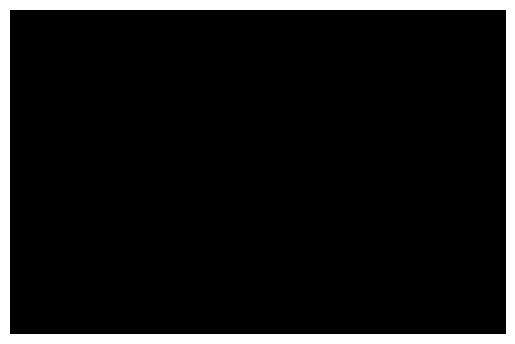

In [94]:
image_path = 'data/deer.bmp'
block_size = 1
d = round((block_size*2 -2)*20/100)
print(d)
d= 0

blocks, num_blocks_height, num_blocks_width, image = divide_image_into_blocks(image_path, block_size)


dct2_blocks = get_dct2_blocks(blocks, block_size, d)

image_matrix = get_image(dct2_blocks, block_size, num_blocks_height, num_blocks_width)

pic = Image.fromarray(image_matrix).convert('L')
pic.save("data/output/test3.bmp")


plt.imshow(image_matrix, cmap='gray')
plt.axis('off')
plt.show()

In [44]:
def compress_img_opt(image_path, block_size, d):
    
    image = Image.open(image_path)
    
    if image.mode != 'L':
        print("converting image as grayscale")
        image = image.convert('L')
    
    image_array = np.array(image)
    
    height, width = image_array.shape
    print(height, width)
    
    num_blocks_height = height // block_size
    num_blocks_width = width // block_size
    
    last_column = num_blocks_width * block_size
    last_row = num_blocks_height * block_size
    
    print("last_column:", last_column)
    print("last_row:", last_row)
    
    
    n_pixel_height = height - last_row
    n_pixel_width = width - last_column
    
    print("n_pixel_height:", n_pixel_height)
    print("n_pixel_width:", n_pixel_width)
    
    
    # Iterate over the blocks and extract each block
    for i in range(num_blocks_height):
        for j in range(num_blocks_width):
            block = image_array[i * block_size:(i + 1) * block_size,
                               j * block_size:(j + 1) * block_size]
            
            block = get_dct2_block(block, block_size, d)
            
            image_array[i * block_size:(i + 1) * block_size, j * block_size:(j + 1) * block_size] = get_image_opt(block, block_size)
    
    for i in range(0, n_pixel_width):
        image_array[:,last_column + i] = image_array[:,last_column-1]
        
    for i in range(0, n_pixel_height): 
        image_array[last_row + i,:] = image_array[last_row-1,:]
        
    print(image_array.shape)
        
    return image_array


def get_dct2_block(block, f, d):
   
    dct2_block = dct2_scipy(block)

    for i in range(0, f):
        for j in range(0, f):
            if i + j >= d:
                dct2_block[i, j] = 0

    return dct2_block

def get_image_opt(dct2_block, f):
     
    image_block = idct2_scipy(dct2_block)

    for i in range(0, f):
        for j in range(0, f):
            image_block[i, j] = round(image_block[i, j])
            image_block[i, j] = max(image_block[i, j], 0)
            image_block[i, j] = min(image_block[i, j], 255)            
    
    return image_block
    

# Effetto di Gibbs e block size

4049 2749
last_column: 2400
last_row: 4000
n_pixel_height: 49
n_pixel_width: 349
(4049, 2749)


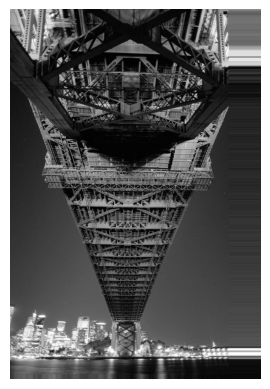

In [70]:
image_path = 'data/bridge.bmp'
block_size = 400
d = (block_size*2 -2)*20/100


image_matrix = compress_img_opt(image_path, block_size, d)


pic = Image.fromarray(image_matrix).convert('L')
pic.save("data/output/test3.bmp")

plt.imshow(image_matrix, cmap='gray')
plt.axis('off')
plt.show()

In [64]:
def get_elapsed(alg, image_path, block_size, d):
    start = time.time()
    
    alg(image_path, block_size, d)
    
    end = time.time()
    return end - start

#######################################################

images = ['prova', '320x320', 'shoe', '640x640', 'deer', 'cathedral', 'bridge']

num_pixel_list = []

alg_times = []

alg_opt_times = []

for pic in images:
    image_path = F'data/{pic}.bmp' 
    block_size = 8
    d = 13
    
    image = Image.open(image_path)
    
    if image.mode != 'L':
        print("converting image as grayscale")
        image = image.convert('L')
    
    image_array = np.array(image)
    
    num_pixel = image_array.shape[0]*image_array.shape[1]
    
    num_pixel_list.append(num_pixel)
        
    alg_times.append(get_elapsed(compress, image_path, block_size, d))
    
    alg_opt_times.append(get_elapsed(compress_img_opt, image_path, block_size, d))

    



converting image as grayscale
converting image as grayscale
100 100
12
12
(96, 96)
converting image as grayscale
100 100
last_column: 96
last_row: 96
n_pixel_height: 4
n_pixel_width: 4
(100, 100)
320 320
40
40
(320, 320)
320 320
last_column: 320
last_row: 320
n_pixel_height: 0
n_pixel_width: 0
(320, 320)
converting image as grayscale
converting image as grayscale
260 260
32
32
(256, 256)
converting image as grayscale
260 260
last_column: 256
last_row: 256
n_pixel_height: 4
n_pixel_width: 4
(260, 260)
640 640
80
80
(640, 640)
640 640
last_column: 640
last_row: 640
n_pixel_height: 0
n_pixel_width: 0
(640, 640)
converting image as grayscale
converting image as grayscale
661 1011
82
126
(656, 1008)
converting image as grayscale
661 1011
last_column: 1008
last_row: 656
n_pixel_height: 5
n_pixel_width: 3
(661, 1011)
3008 2000
376
250
(3008, 2000)
3008 2000
last_column: 2000
last_row: 3008
n_pixel_height: 0
n_pixel_width: 0
(3008, 2000)
4049 2749
506
343
(4048, 2744)
4049 2749
last_column: 27

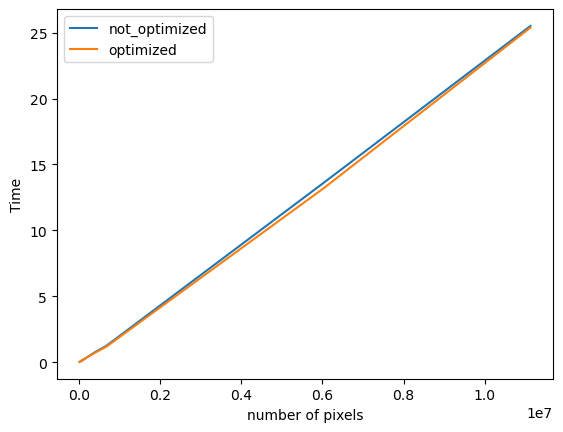

In [68]:
plt.plot(num_pixel_list, alg_times, label = "not_optimized")
plt.plot(num_pixel_list, alg_opt_times, label = "optimized")


plt.xlabel("number of pixels")
plt.ylabel("Time")

plt.legend()
plt.show()


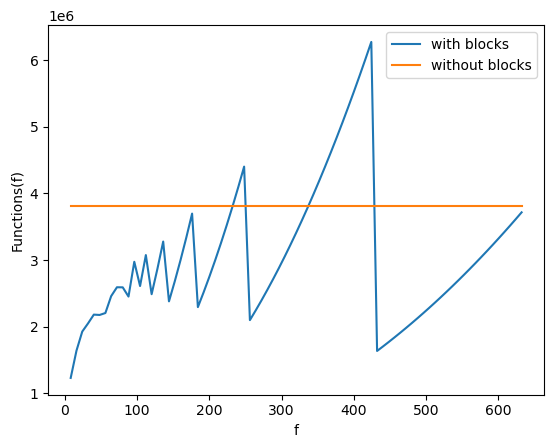

In [115]:
n = 640
f1_list = []
f_list = []
f2_list = []

for f in range (8, n, 8):
    
    f_list.append(f)
    
    f1 = (round(n/f)**2) * (f**2) * np.log2(f) 
    f1_list.append(f1)
    
    f2_list.append((n**2) * np.log2(n))



plt.plot(f_list, f1_list, label = "with blocks")
plt.plot(f_list, f2_list, label = "without blocks")


plt.xlabel("f")
plt.ylabel("Functions(f)")

plt.legend()
plt.show()


In [111]:
def get_elapsed(alg, image_path, block_size, d):
    start = time.time()
    
    alg(image_path, block_size, d)
    
    end = time.time()
    return end - start

#######################################################

alg_times = []

image_path = 'data/640x640.bmp' 


f_list = []

for f in range (8, 640, 8):
    block_size = f
    d = (block_size*2 -2)*20/100 
    
        
    alg_times.append(get_elapsed(compress, image_path, block_size, d))
    
    f_list.append(f)

640 640
80
80
(640, 640)
640 640
40
40
(640, 640)
640 640
26
26
(624, 624)
640 640
20
20
(640, 640)
640 640
16
16
(640, 640)
640 640
13
13
(624, 624)
640 640
11
11
(616, 616)
640 640
10
10
(640, 640)
640 640
8
8
(576, 576)
640 640
8
8
(640, 640)
640 640
7
7
(616, 616)
640 640
6
6
(576, 576)
640 640
6
6
(624, 624)
640 640
5
5
(560, 560)
640 640
5
5
(600, 600)
640 640
5
5
(640, 640)
640 640
4
4
(544, 544)
640 640
4
4
(576, 576)
640 640
4
4
(608, 608)
640 640
4
4
(640, 640)
640 640
3
3
(504, 504)
640 640
3
3
(528, 528)
640 640
3
3
(552, 552)
640 640
3
3
(576, 576)
640 640
3
3
(600, 600)
640 640
3
3
(624, 624)
640 640
2
2
(432, 432)
640 640
2
2
(448, 448)
640 640
2
2
(464, 464)
640 640
2
2
(480, 480)
640 640
2
2
(496, 496)
640 640
2
2
(512, 512)
640 640
2
2
(528, 528)
640 640
2
2
(544, 544)
640 640
2
2
(560, 560)
640 640
2
2
(576, 576)
640 640
2
2
(592, 592)
640 640
2
2
(608, 608)
640 640
2
2
(624, 624)
640 640
2
2
(640, 640)
640 640
1
1
(328, 328)
640 640
1
1
(336, 336)
640 640
1
1
(344, 

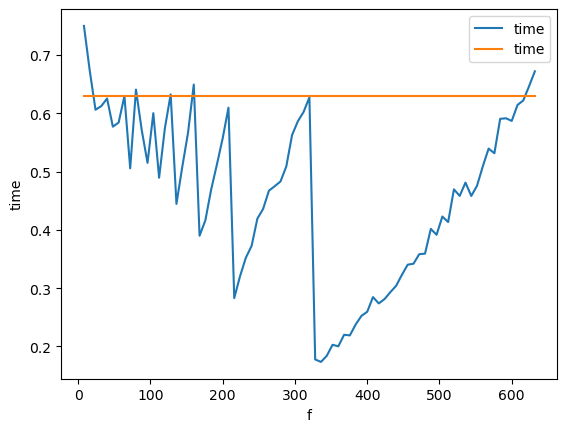

In [114]:
plt.plot(f_list, alg_times, label = "time")
plt.plot(f_list, [t for i in range(len(f_list))], label = "time")


plt.xlabel("f")
plt.ylabel("time")

plt.legend()
plt.show()


In [117]:
block_size = 350
d = (block_size*2 -2)*20/100 



t = get_elapsed(compress, image_path, block_size, d)

t

640 640
1
1
(350, 350)


0.2251145839691162